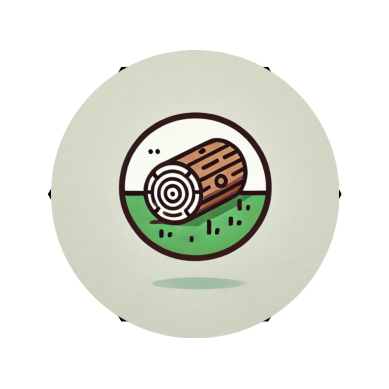

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import matplotlib.patches as patches

# Function to create a hexagon image with a stretched image and a circular border overlay
def create_hexagon_with_layers(side_length_mm, hex_color='#FFFFFF', border_color='#000000', border_thickness=2,
                               image_path=None, overlay_color='#FF0000', overlay_thickness=5):
    # First Layer: Draw the hexagon (Base layer)
    angles = np.linspace(0, 2 * np.pi, 7)
    x = side_length_mm * np.cos(angles)
    y = side_length_mm * np.sin(angles)

    fig, ax = plt.subplots()
    ax.fill(x, y, color=hex_color, edgecolor=border_color, linewidth=border_thickness)
    ax.set_aspect('equal')

    # Set limits to match the hexagon size
    ax.set_xlim(-side_length_mm - 1, side_length_mm + 1)
    ax.set_ylim(-side_length_mm - 1, side_length_mm + 1)

    # Second Layer: Stretch and add the custom image
    if image_path:
        img = Image.open(image_path).convert('RGBA')
        
        # Calculate the bounds for stretching the image to fit inside the hexagon's bounding box
        min_x, max_x = min(x), max(x)
        min_y, max_y = min(y), max(y)
        
        # Resize the image to match the bounding box of the hexagon
        img = img.resize((int((max_x - min_x) * 100), int((max_y - min_y) * 100)))  # Scale the image based on hexagon size
        img_np = np.array(img)

        # Overlay the stretched image inside the hexagon's bounding box
        ax.imshow(img_np, extent=[min_x, max_x, min_y, max_y], zorder=2)

    # Third Layer: Add a color overlay with a circular cutout in the middle (Top layer)
    overlay_radius = side_length_mm  # Adjust the radius based on the hexagon size
    overlay_circle = patches.Circle((0, 0), overlay_radius + overlay_thickness, 
                                    edgecolor=overlay_color, facecolor='none', 
                                    linewidth=overlay_thickness, zorder=3)
    ax.add_patch(overlay_circle)

    # Remove axes for clean image
    ax.axis('off')
    
    # Save image to a file
    plt.savefig('hexagon_with_stretched_image.png', bbox_inches='tight', transparent=True, dpi=300)
    plt.show()

# Hexagon side length in mm
side_length_mm = 3.5

# Call the function to create the hexagon with layers
create_hexagon_with_layers(
    side_length_mm, 
    hex_color='#FFFFFF', 
    border_color='#000000', 
    border_thickness=4, 
    image_path='wood.webp',  # Path to your .webp image
    overlay_color='#FF5733',  # Color of the overlay border
    overlay_thickness=5  # Thickness of the overlay circle
)
